Question 1: 1111001
Question 2:

In [3]:
from scipy.constants import epsilon_0,e
from math import pi,sqrt
import numpy as np
def calc_Madelung1(lattice_size):
    L = lattice_size
    res = 0
    for i in range(-L,L):
        for j in range(-L,L):
            for k in range(-L,L):
                if 0 == i == k == j:
                    continue
                if (i+j+k)%2 == 1:
                    res += 1/(sqrt(i**2+j**2+k**2))
                else:
                    res-= 1/(sqrt(i**2+j**2+k**2))
    return res
def calc_Madelung2(lattice_size):
    L = lattice_size
    i,j,k = np.meshgrid(np.arange(-L,L),np.arange(-L,L),np.arange(-L,L),indexing = 'ij')
    distances = np.sqrt(i**2+j**2+k**2)
    distances[distances == 0] = np.inf
    sum_vals = np.where((i+j+k)%2==0,1,-1)/distances
    return np.sum(sum_vals)

%timeit calc_Madelung2(50)
%timeit calc_Madelung1(50)

The slowest run took 4.70 times longer than the fastest. This could mean that an intermediate result is being cached.
229 ms ± 93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.45 s ± 1.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Question 3

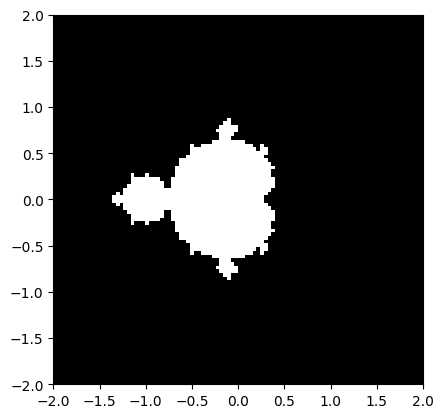

In [5]:
import matplotlib.pyplot as plt
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,y)
Z = X+1j*Y
for _ in range(100):
    mask = np.abs(Z) < 2
    Z[mask] = Z[mask]**2 + (X[mask]+1j*Y[mask])
plt.imshow(np.abs(Z) < 2, extent = (-2,2,-2,2),origin = 'lower', cmap = 'gray' )
plt.show()





Question 4:

In [6]:
def quadratic_formula(a,b,c):
    a, b, c = np.float64(a), np.float64(b), np.float64(c)
    root_1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
    root_2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
    if root_1 != root_2:
        return root_1,root_2
    return root_1
def quadratic_formula2(a,b,c):
    a, b, c = np.float64(a), np.float64(b), np.float64(c)
    root_1 = 2*c/(-b + np.sqrt(b**2-4*a*c))
    root_2 = 2*c/(-b - np.sqrt(b**2-4*a*c))
    if root_1 != root_2:
        return root_1,root_2
    return root_1
print(quadratic_formula(.001,1000,.001))
print(quadratic_formula2(.001,1000,.001))




(-9.999894245993346e-07, -999999.999999)
(-1000010.5755125057, -1.000000000001e-06)
